# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Saya menggunakan AI_Impact_on_Jobs_2030 dataset dengan link berikut : https://www.kaggle.com/datasets/khushikyad001/ai-impact-on-jobs-2030


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
csv_path = "/content/AI_Impact_on_Jobs_2030_raw.csv"

df = pd.read_csv(csv_path)

df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



=== CEK MISSING VALUES ===


,0
Job_Title,0
Average_Salary,0
Years_Experience,0
Education_Level,0
AI_Exposure_Index,0
Tech_Growth_Factor,0
Automation_Probability_2030,0
Risk_Category,0
Skill_1,0
Skill_2,0



=== CEK DUPLIKAT ===
Jumlah duplikat: 0

=== KOLOM KATEGORIK ===
Index(['Job_Title', 'Education_Level', 'Risk_Category'], dtype='object')

=== KOLOM NUMERIK ===
Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10'],
      dtype='object')

=== JUMLAH UNIQUE VALUE PER KOLOM KATEGORIK ===


,0
Job_Title,20
Education_Level,4
Risk_Category,3


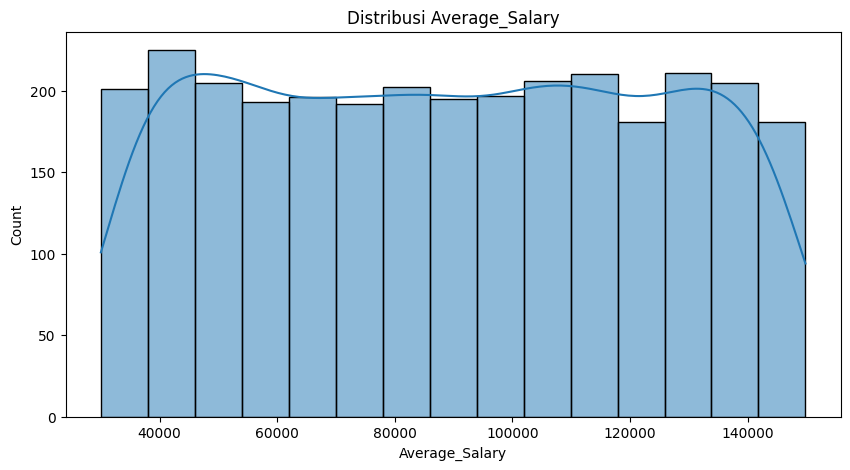

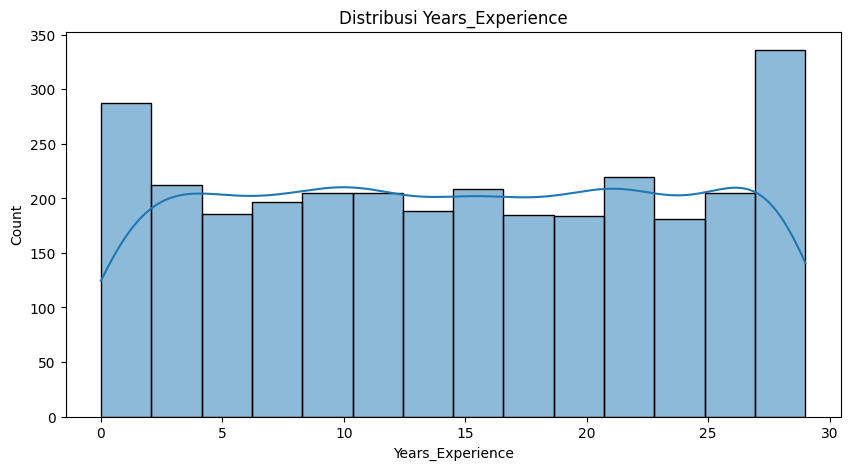

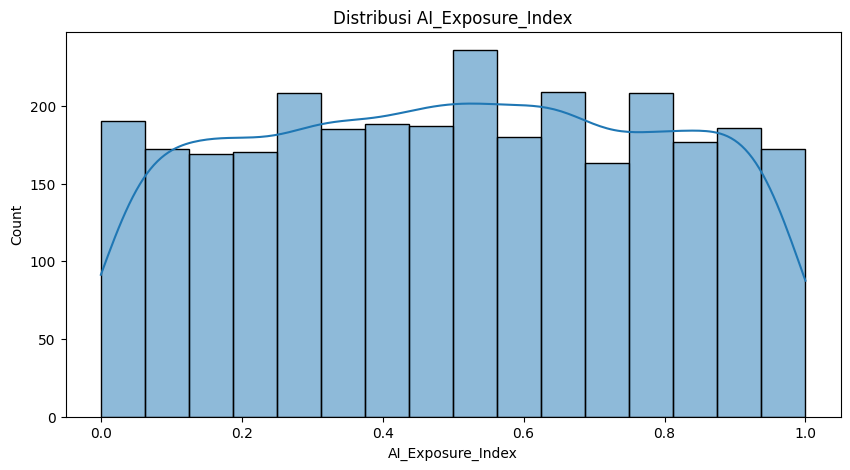

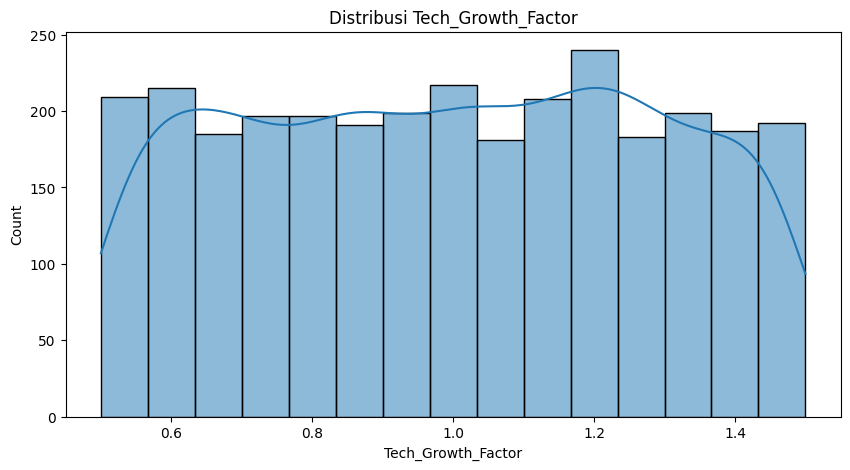

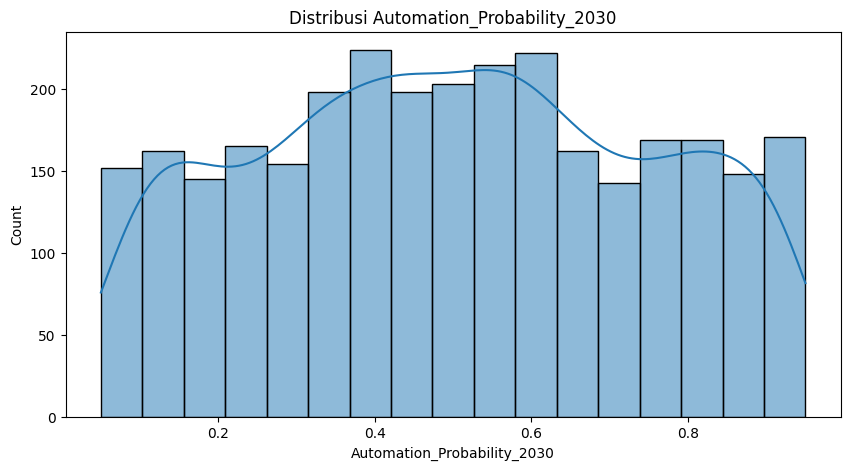

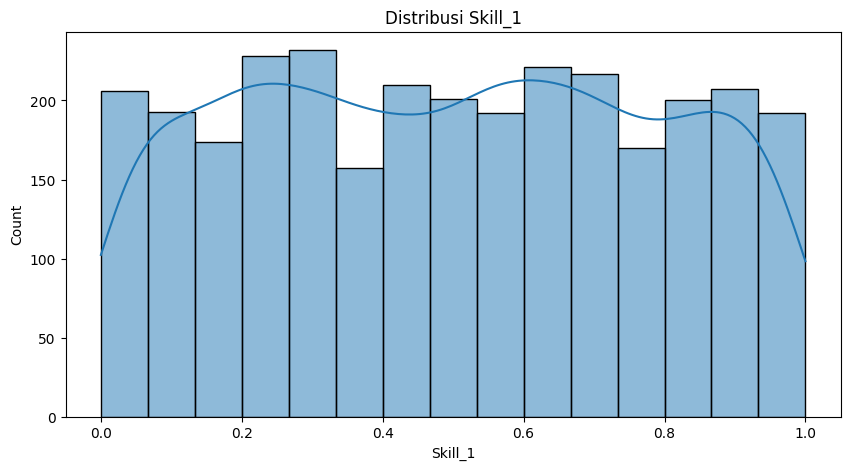

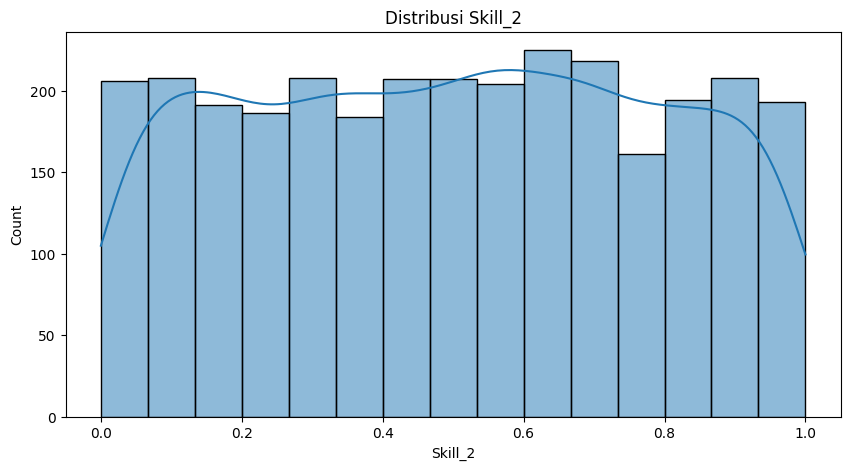

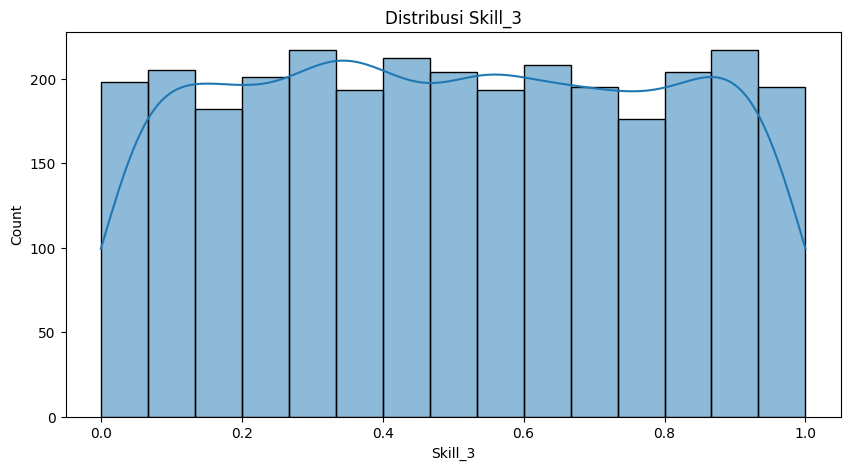

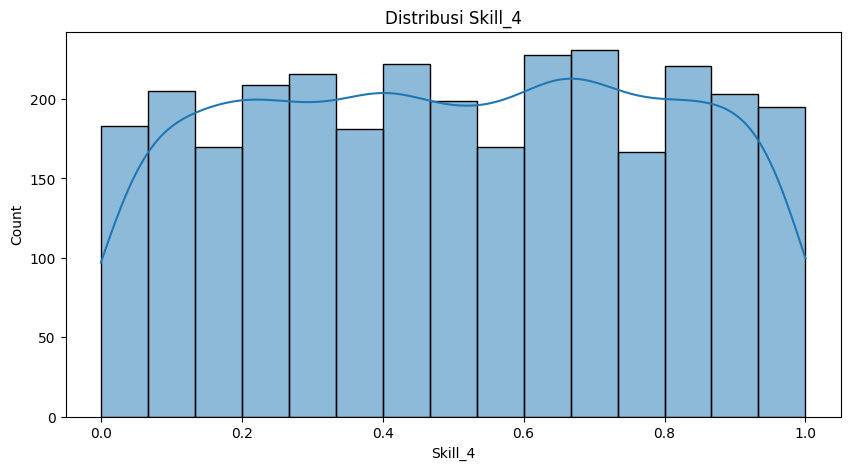

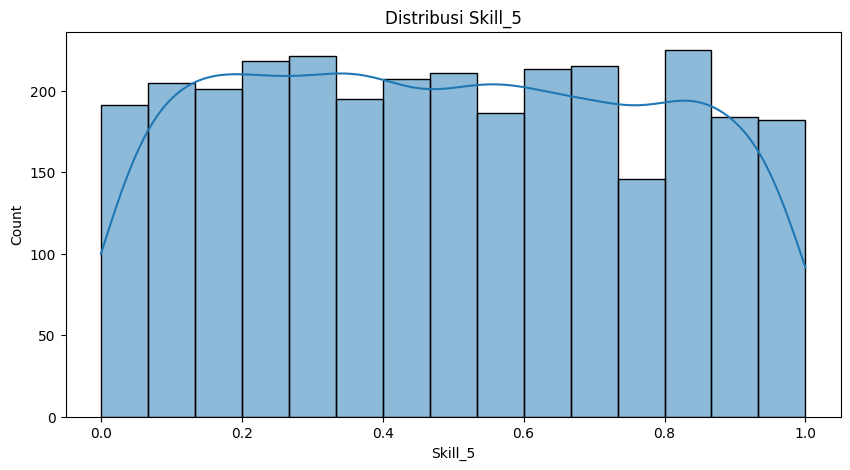

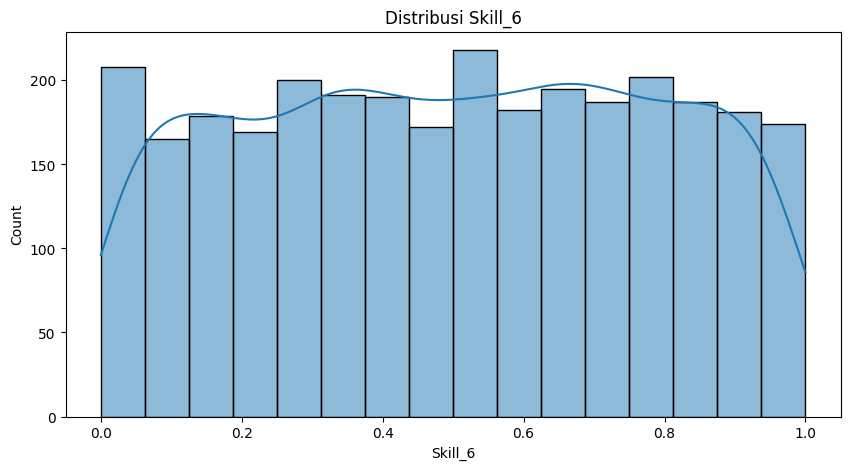

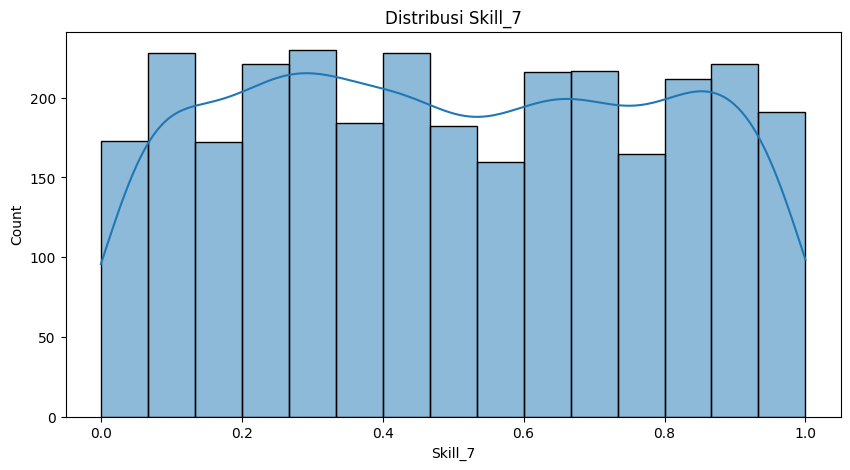

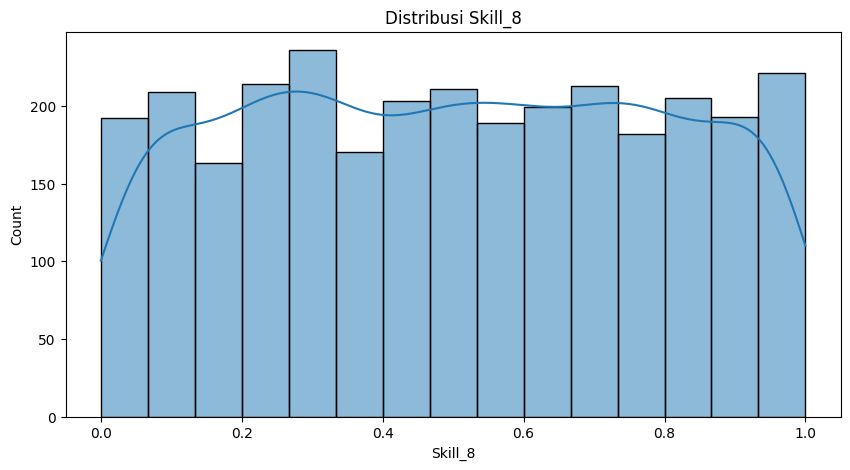

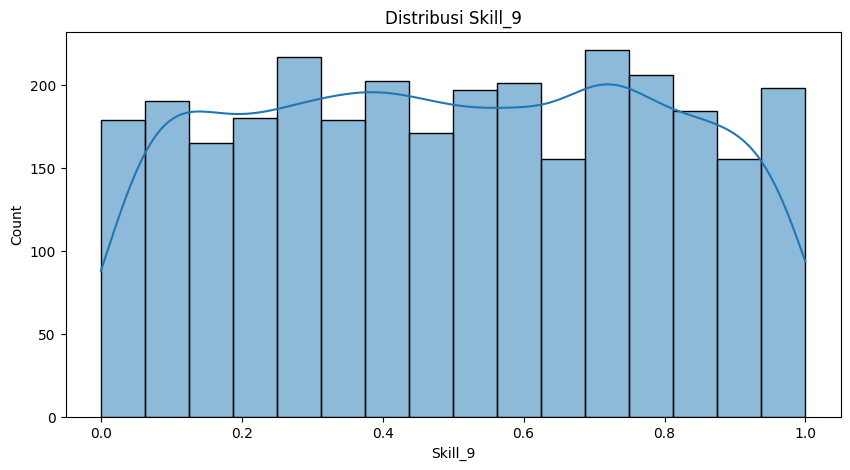

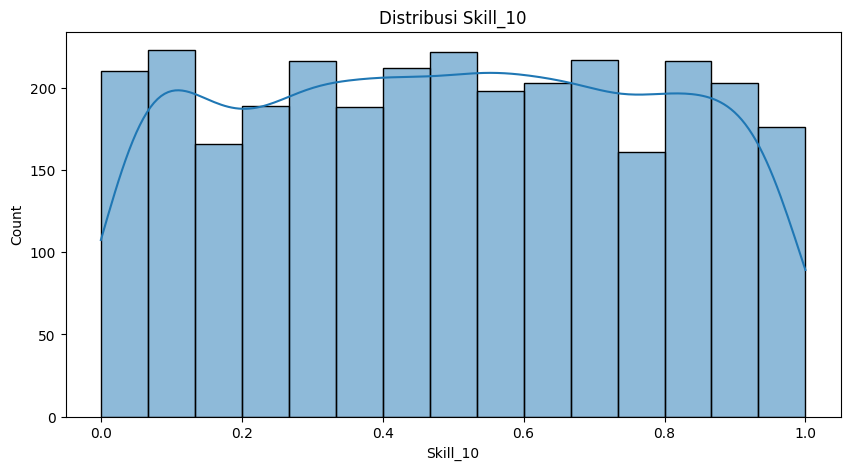

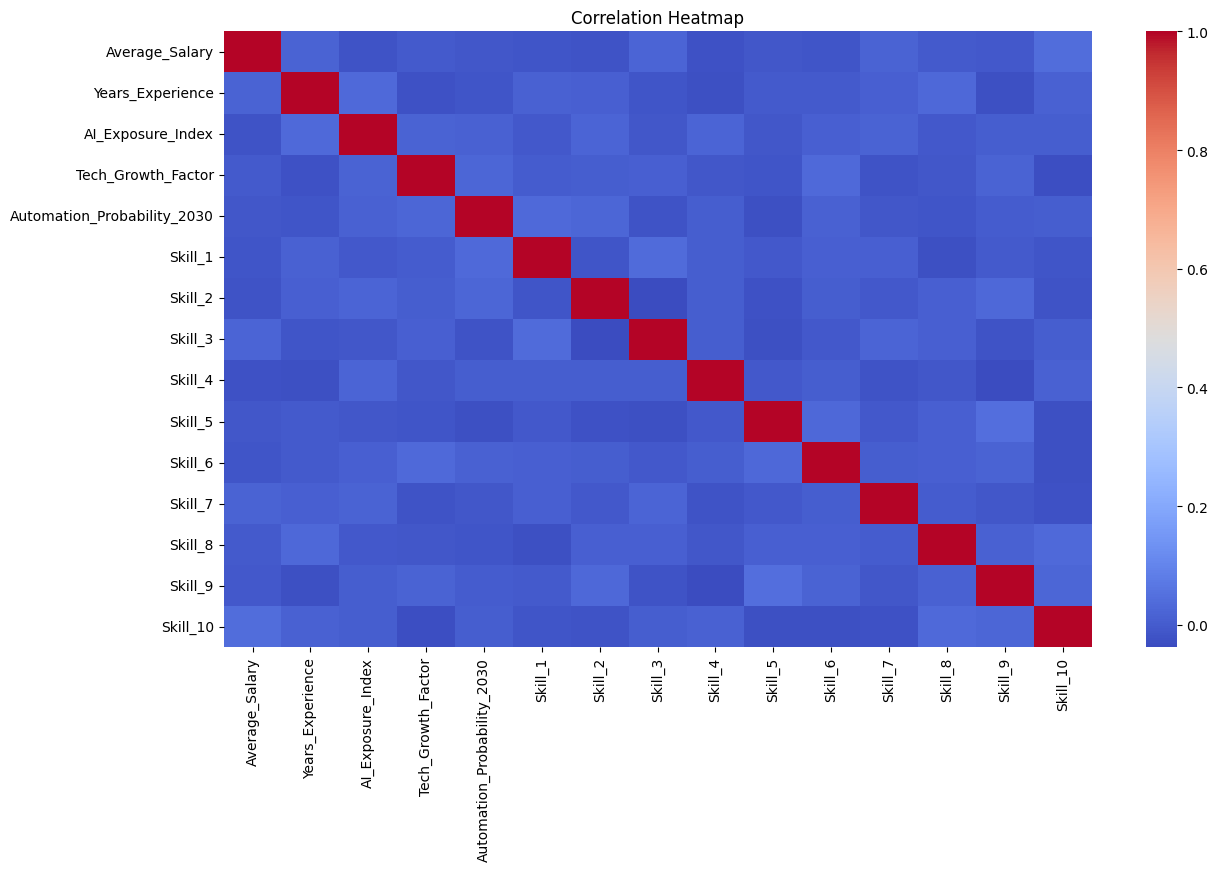

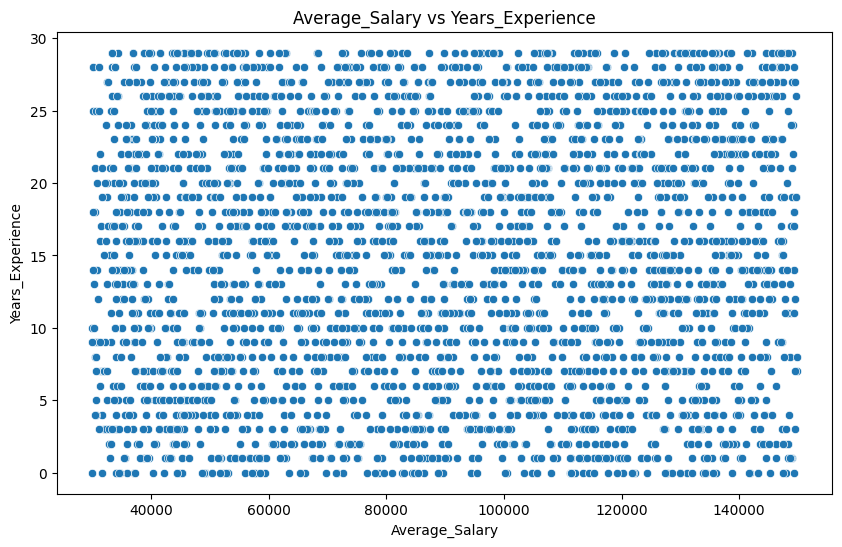

In [4]:
print("=== INFO DATA ===")
df.info()

print("\n=== DESKRIPSI DATA NUMERIK ===")
display(df.describe())

print("\n=== CEK MISSING VALUES ===")
display(df.isna().sum())

print("\n=== CEK DUPLIKAT ===")
print("Jumlah duplikat:", df.duplicated().sum())

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("\n=== KOLOM KATEGORIK ===")
print(categorical_cols)

print("\n=== KOLOM NUMERIK ===")
print(numerical_cols)

print("\n=== JUMLAH UNIQUE VALUE PER KOLOM KATEGORIK ===")
display(df[categorical_cols].nunique())

for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

if len(numerical_cols) > 1:
    plt.figure(figsize=(14,8))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

if len(numerical_cols) >= 2:
    sample_pairs = numerical_cols[:2]
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=sample_pairs[0], y=sample_pairs[1])
    plt.title(f"{sample_pairs[0]} vs {sample_pairs[1]}")
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
df_clean = df.copy()

df_clean.drop_duplicates(inplace=True)


df_clean.dropna(inplace=True)

categorical_cols = ['Job_Title', 'Education_Level', 'Risk_Category']
numerical_cols = df_clean.select_dtypes(include=['int64','float64']).columns.tolist()

print("Kolom Numerik:", numerical_cols)
print("Kolom Kategorik:", categorical_cols)

Q1 = df_clean[numerical_cols].quantile(0.25)
Q3 = df_clean[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_clean[~(
    (df_clean[numerical_cols] < (Q1 - 1.5 * IQR)) |
    (df_clean[numerical_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

print("Shape setelah outlier removal:", df_clean.shape)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Transform data
processed_array = preprocessor.fit_transform(df_clean)

encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

final_cols = list(numerical_cols) + list(encoded_cols)

df_processed = pd.DataFrame(processed_array, columns=final_cols)

print("\n=== Data Setelah Preprocessing ===")
display(df_processed.head())
print("Shape akhir:", df_processed.shape)


Kolom Numerik: ['Average_Salary', 'Years_Experience', 'AI_Exposure_Index', 'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8', 'Skill_9', 'Skill_10']
Kolom Kategorik: ['Job_Title', 'Education_Level', 'Risk_Category']
Shape setelah outlier removal: (3000, 18)

=== Data Setelah Preprocessing ===


,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Job_Title_Security Guard,Job_Title_Software Engineer,Job_Title_Teacher,Job_Title_Truck Driver,Job_Title_UX Researcher,Education_Level_High School,Education_Level_Master's,Education_Level_PhD,Risk_Category_Low,Risk_Category_Medium
0,-1.259374,1.524586,-1.131450,0.989695,1.406136,-0.163192,-1.379103,-0.136360,-0.605079,-1.225706,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.271092,0.609079,0.418080,0.398639,-1.821754,-1.657076,0.079041,-0.344472,-1.580638,1.678728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.642772,-1.450811,1.263278,0.642015,1.244741,-1.691818,1.537185,0.210494,-0.396031,-1.645624,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.362849,-0.191989,-0.391902,-1.096386,0.397420,-0.232675,-0.997208,0.245179,-1.650321,1.223816,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.548382,0.837956,0.065914,1.615519,0.558815,0.879052,0.148476,0.314550,1.624770,0.418973,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Shape akhir: (3000, 39)
